# PROJECT OBJECTIVES:

The project's objective is to conduct Exploratory Data Analysis (EDA), Hypothesis Testing, and Linear Regression to determine if there's a relationship between payment type and fare amount in taxi rides. Specifically, it aims to assess whether customers using credit cards pay higher fares compared to those using cash. The results of the A/B test could provide insights for TLC to potentially increase revenue by understanding the impact of payment methods on fare amounts.

## IMPORT PACKAGES

In [319]:
import numpy as np
import pandas as pd
from scipy import stats
import datetime as dt

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

## IMPORT THE DATA SET

In [320]:
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

## EXPLORATORY ANALYSIS OF THE DATA

In [321]:
df.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

There is no missing data according to the results from the info() function.

In [323]:
df.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [324]:
df.duplicated().sum()

0

The isna() and duplicated() functions just confirmed as well that there are no missing nor duplicated data.

### FEATURE SELECTION (DROPPING OFF IRRELEVANT COLUMNS)

In [325]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [326]:
df1 = df.copy()

df1 = df1.drop(['Unnamed: 0', 'store_and_fwd_flag',
               'extra', 'mta_tax','tolls_amount', 'improvement_surcharge'], axis = 1)

In [327]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   PULocationID           22699 non-null  int64  
 7   DOLocationID           22699 non-null  int64  
 8   payment_type           22699 non-null  int64  
 9   fare_amount            22699 non-null  float64
 10  tip_amount             22699 non-null  float64
 11  total_amount           22699 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.1+ MB


In [328]:
df1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,1.835781,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,2.800626,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,0.000000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,1.350000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,2.450000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,200.000000,1200.290000


There is much margin between the minimum and maximun values on the fare_amount column and total amount column.\
Also, it's questionable how there are negative values for fare_amount and total amount.

In [329]:
#Sort and interpret the data table for Total Amount(Top 10) and Botttom(10)
total_amount_sorted = df1['total_amount'].sort_values(ascending=False)
print('Top 10 Total Amount')
print(total_amount_sorted.head(10))
print()
print('Bottom 10 Total Amount')
print(total_amount_sorted.tail(10))

Top 10 Total Amount
8476     1200.29
20312     450.30
13861     258.21
12511     233.74
15474     211.80
6064      179.06
16379     157.06
3582      152.30
11269     151.82
9280      150.30
Name: total_amount, dtype: float64

Bottom 10 Total Amount
5448      -4.3
4423      -4.3
10281     -4.3
8204      -4.8
20317     -4.8
11204     -5.3
14714     -5.3
17602     -5.8
20698     -5.8
12944   -120.3
Name: total_amount, dtype: float64


Its not possible for Amount column to be in Negative and the reason for this is not clearly understood.




FROM THE DATA, THERE ARE 4 PAYMENT TYPES WHICH HAVE BEEN ASSIGNED NUMBERS\
CREDIT CARD = 1\
CASH = 2\
No charge = 3\
Dispute = 4\
Unknown = 5\
Voided trip = 6

In [330]:
df1['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [331]:
#Average tip for trips paid for with Credit Card
Avg_CC_tip = df1[df1['payment_type']==1]['tip_amount'].mean()
print('Average Credit Card tip: ', Avg_CC_tip)

#Average tip for trips paid for with Cash
Avg_Cash_tip = df1[df1['payment_type']==2]['tip_amount'].mean()
print('Average Cash tip: ', Avg_Cash_tip)


Average Credit Card tip:  2.7298001965280054
Average Cash tip:  0.0


It can be deduced that only customers that paid with Credit cards tipped the drivers.

In [332]:
# How many times is each vendor ID represented in the data
df1['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [333]:
#Mean total amount per Vendor
mean_total_amount_per_vendor = df1.groupby('VendorID')['total_amount'].mean()
mean_total_amount_per_vendor

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

Although Vendor ID 2 is a little bit more represented in the data than VendorID 1, both of them share a very close mean total amount per vendor.

### FEATURE EXTRACTION AND FEATURE TRANSFORMATION 
(Converting date columns into Datetime format and creating new columns relevant for the analysis)

Convert the Trip Pick-Up and Dropoff Columns to Datetime

In [334]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

Create a new column called Duration that represents the total number of minutes that each taxi ride took.

In [335]:
df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [336]:
df1['duration'].head(3)

0    14.066667
1    26.500000
2     7.200000
Name: duration, dtype: float64

Create a Month and a Day Column from Pickup Datetime

In [337]:
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

### FURTHER EXPLORATORY ANALYSIS OF THE DATASET

In [338]:
# Get total number of rides for each month
monthly_rides = df1['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

The months are out of order.

Reorder the results to put the months in calendar order.

In [339]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

In [340]:
# Repeat the process, this time for total revenue by month
total_revenue_by_month = df1.groupby('month')['total_amount'].sum()
total_revenue_by_month = total_revenue_by_month.reindex(index=month_order)
total_revenue_by_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

May had the highest revenue by month while July had the least. The monthly revenue have a close distribution within themselves.

In [341]:
# Repeat the above process, this time for rides by day
daily_rides = df1['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

Surprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

In [342]:
# Repeat the process, this time for total revenue by day
revenue_per_day = df1.groupby('day')['total_amount'].sum()
revenue_per_day = revenue_per_day.reindex(index=day_order)
revenue_per_day


day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

Thursday had the highest gross revenue of all days while Sunday and Monday had the least.

In [343]:
# Get number of unique drop-off location IDs
df1['DOLocationID'].nunique()

216

### HANDLING OUTLIERS

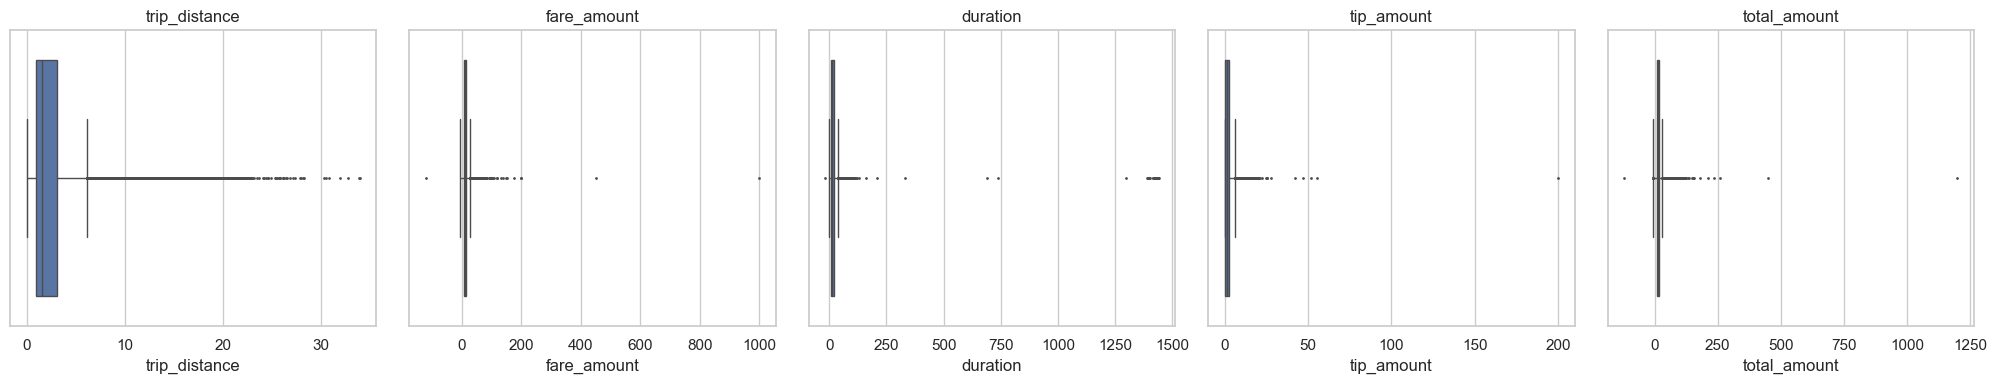

In [344]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
columns_to_plot = ['trip_distance', 'fare_amount', 'duration', 'tip_amount', 'total_amount']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(ax=axes[i], x=df1[column], fliersize=1)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

All five variables contain outliers. Some are extreme, but others not so much.

From the summary statistics, there were trip distance of 0. I dont think they are reflective of erroneous data, or are very short trips that got rounded down. This is because its possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.


Calculate the count of rides where the trip_distance is zero.

In [345]:
sum(df1['trip_distance']==0)

148

148 out of ~23,000 rides is relatively insignificant. It's unlikely to have much of an effect on the model. Therefore, the trip_distance column will remain untouched with regard to outliers.

Fare_amount Outliers

#### Defining a function for Outlier

In [346]:
# Impute values less than $0 with 0. This would remove all negative values
df1['fare_amount'] = np.where(df1['fare_amount'] < 0, 0, df1['fare_amount'])
df1['fare_amount'].min()

0.0

In [347]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.
        For this project, the IQR Factor used is 6.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df1.loc[df1[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
# Reassign values > threshold to threshold
        df1.loc[df1[col] > upper_threshold, col] = upper_threshold

# Example usage
outlier_imputer(['trip_distance', 'fare_amount', 'duration'], 6)

In [348]:
df1[['trip_distance', 'fare_amount', 'duration']].describe()

,trip_distance,fare_amount,duration
count,22699.000000,22699.000000,22699.000000
mean,2.823424,12.897913,14.460555
std,3.252029,10.541137,11.947043
min,0.000000,0.000000,0.000000
25%,0.990000,6.500000,6.650000
50%,1.610000,9.500000,11.183333
75%,3.060000,14.500000,18.383333
max,15.480000,62.500000,88.783333


In [349]:
# Impute 0 for all negative values for Total Amount
df1.loc[df1['total_amount'] < 0] = 0
df1['total_amount'].min()

C:\Users\user\AppData\Local\Temp\ipykernel_6648\1478392714.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df1.loc[df1['total_amount'] < 0] = 0
C:\Users\user\AppData\Local\Temp\ipykernel_6648\1478392714.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df1.loc[df1['total_amount'] < 0] = 0


0.0

We would not be handling Outliers for Total Amount and Tip Amount because the values are normal to occur

In [350]:
#Examine the unique values in the passenger_count column.
print(df1['passenger_count'].value_counts())
print()
print(df1['passenger_count'].value_counts(normalize=True))

passenger_count
1    16107
2     3303
5     1142
3      953
6      692
4      455
0       47
Name: count, dtype: int64

passenger_count
1    0.709591
2    0.145513
5    0.050311
3    0.041984
6    0.030486
4    0.020045
0    0.002071
Name: proportion, dtype: float64


71% of the rides were single occupancy, though there were 692 rides with as many as six passengers. Also, there are 47 rides with an occupancy count of zero, which doesn't make sense. It could be that the drivers drove to dispatch an item or likewise.

# HYPOTHESIS TESTING

I conducted an A/B test to the sample data to analyze whether there is a relationship between payment type and fare amount. I want to discover if customers who use credit cards pay higher fare amounts than customers who use cash. Without this analysis, we cannot draw causal conclusions about how payment method affects fare amount. The A/B test results could also find ways to generate more revenue for taxi cab drivers.

 In the dataset, payment_type is encoded in integers:

1: Credit card\
2: Cash\
3: No charge\
4: Dispute\
5: Unknown

In [351]:
#look at the average fare amount for each payment type.
df1.groupby('payment_type')['fare_amount'].mean()

payment_type
0     0.000000
1    13.279181
2    12.105683
3    13.101053
4    15.320513
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. To assess whether the difference is statistically significant, I conducted a hypothesis test.

H0: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

HA: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

I choose 5% as the significance level and proceed with a two-sample T-Test.

In [352]:
#Hypothesis test, A/B test
#Significance level

credit_card = df1[df1['payment_type'] == 1]['fare_amount']
cash = df1[df1['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=7.996175276596432, pvalue=1.3765864800455104e-15, df=14997.741789247446)

Since the p-value is significantly smaller than the significance level of 5%, I rejected the null hypothesis.
From the analysis, there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

## Business insight(s) drawn from the result of my Hypothesis Test

1. The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

## MODEL EVALUATION

### Feature Extraction for Model 

Create the following columns
1. Pickup_dropoff 
2. Mean_Distance (derived from Pickup_dropoff)
3. Mean_Duration (derived from Pickup_dropoff)
4. Rush hour

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you do know to generalize about ones you do not know.

In this step, create a column called Mean_Distance that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

| Trip |	Start  |	End   |	Distance |
|------|---------|--------|------------|
| 1    |	A      |	B     |	1        |
| 2    |	C      |	D     |	2        |
| 3    |	A      |	B     |	1.5      |
| 4    |	D      |	C     |	3        |

The results should be:

A -> B: 1.25 miles\
C -> D: 2 miles\
D -> C: 3 miles\
Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column mean_distance will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

| Trip |	Start  |	End   |	Distance |	mean_distance |
|------|---------|--------|------------|------------------------|
| 1    |	A      |	B     |	1        |	1.25          |
| 2    |	C      |	D     |	2        |	2             |
| 3    |	A      |	B     |	1.5      |	1.25          |
| 4    |	D      |	C     |	3        |	3             |

Begin by creating a helper column called pickup_dropoff, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

| Trip |	Start  |	End  |	pickup_dropoff |
|------|---------|-------|-------------------|
| 1    |	A      |	B    |	'A B'          |
| 2    |	C      |	D    |	'C D'          |
| 3    |	A      |	B    |	'A B'          |
| 4    |	D      |	C    |	'D C'          |

In [353]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

Now, use a groupby() statement to group each row by the new pickup_dropoff column, compute the mean, and capture the values only in the trip_distance column. Assign the results to a variable named grouped.

In [354]:
grouped_pickup_dropoff = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped_pickup_dropoff.head(2)

,trip_distance
pickup_dropoff,
0 0,0.000000
1 1,2.433333


grouped_pickup_dropoff is an object of the DataFrame class.

Convert it to a dictionary using the to_dict() method. Assign the results to a variable called grouped_dict. This will result in a dictionary with a key of trip_distance whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information we want.

Example:\
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}\
Reassign the grouped_dict dictionary so it contains only the inner dictionary. In other words, get rid of trip_distance as a key.

Example:\
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}

In [355]:
# 1. Convert `grouped_pickup_dropoff` to a dictionary
grouped_dict = grouped_pickup_dropoff.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [356]:
grouped_dict

{'0 0': 0.0,
 '1 1': 2.433333333333333,
 '10 148': 15.480000000000002,
 '100 1': 15.480000000000002,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 15.480000000000002,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232'

Create a Mean_Distance column that is a copy of the pickup_dropoff column.

Use the map() method on the mean_distance series. Pass grouped_dict as its argument. Reassign the result back to the mean_distance series. When you pass a dictionary to the Series.map() method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

When used this way, the map() Series method is very similar to replace(). However, note that map() will impute NaN for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [357]:
# 1. Create a mean_distance column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


Create mean_duration column\
Repeat the process used to create the mean_distance column to create a mean_duration column.

In [358]:
grouped_mean_duration = df1.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped_mean_duration

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration_dict = grouped_mean_duration.to_dict()
grouped_duration_dict = grouped_duration_dict['duration']

df1['mean_duration'] = df1['pickup_dropoff']
df1['mean_duration'] = df1['mean_duration'].map(grouped_duration_dict)

# Confirm that it worked
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


Create rush_hour column\
Defined rush hour as: Any weekday (not Saturday or Sunday) and either from 06:00am –10:00am or from 16:00pm –20:00pm.

Create a binary rush_hour column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [359]:
# Create 'rush_hour' col
df1['rush_hour'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df1.loc[df1['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0


In [360]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [361]:
# Apply the `rush_hourizer()` function to the new column
df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)
df1.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_6648\1985866331.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1 0 1 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df1.loc[(df1.day != 'saturday') & (df1.day != 'sunday'), 'rush_hour'] = df1.apply(rush_hourizer, axis=1)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,100,231,1,13.0,2.76,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,1
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,186,43,1,16.0,4.00,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0


Create a scatterplot to visualize the relationship between mean_duration and fare_amount.

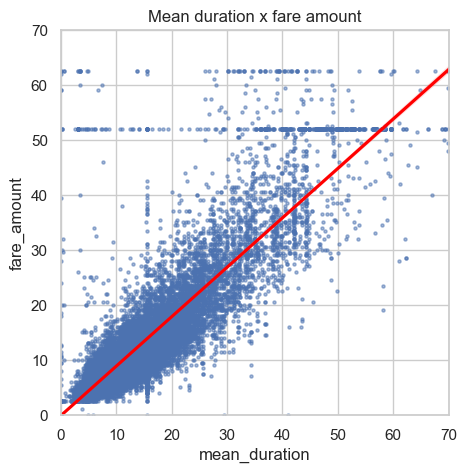

In [362]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['mean_duration'], y=df1['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The mean_duration variable correlates with the target variable. The reason for the first horizontal line($52 cents) is quite unknown but the second horizontal line ($62.50 cents) is the maximum that was imputed for all outliers.

Check the value of the rides in the first horizontal line.

In [363]:
df1[df1['fare_amount'] > 50]['fare_amount'].value_counts()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: count, dtype: int64

There are 514 trips whose fares were $52.

Examine the first 30 of these trips.

In [364]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
df1[df1['fare_amount']==52].head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,15.48,2,236,132,1,52.0,14.58,72.92,36.800000,March,Sunday,236 132,15.480000,40.500000,1
110,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,15.48,2,132,163,1,52.0,0.00,52.80,66.850000,June,Saturday,132 163,15.480000,52.941667,0
161,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,132,132,2,52.0,0.00,52.80,0.966667,November,Saturday,132 132,1.941034,3.021839,0
247,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,15.48,2,132,79,2,52.0,0.00,52.80,29.183333,December,Wednesday,132 79,15.480000,47.275000,0
379,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,15.48,2,132,234,1,52.0,14.64,73.20,29.483333,September,Sunday,132 234,15.480000,49.833333,0
388,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,15.48,2,132,48,2,52.0,0.00,62.84,39.833333,February,Tuesday,132 48,15.480000,58.246032,1
406,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,228,88,2,52.0,0.00,58.56,15.616667,June,Monday,228 88,4.730000,15.616667,0
449,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,15.48,2,132,48,2,52.0,0.00,58.56,45.450000,August,Thursday,132 48,15.480000,58.246032,0
468,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,15.48,2,186,132,2,52.0,0.00,58.56,42.850000,September,Tuesday,186 132,15.480000,42.920000,0
520,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,15.48,2,132,148,1,52.0,5.00,57.80,71.583333,April,Sunday,132 148,15.480000,46.340476,0


It seems that almost all of the trips in the first 10 rows where the fare amount was $52 either begins or ended at location 132, and all of them have a RatecodeID of 2.

There is no apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and $5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. From the data dictionary, RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "New York City taxi flat rate IN 2017" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

### Feature Selection For the Model

In [365]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount',
       'total_amount', 'duration', 'month', 'day', 'pickup_dropoff',
       'mean_distance', 'mean_duration', 'rush_hour'],
      dtype='object')

Isolate modeling variables\
Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [366]:
df2 = df1.copy()
df2 = df2.drop(['tpep_dropoff_datetime','RatecodeID', 'tpep_pickup_datetime',
               'trip_distance', 'PULocationID', 'DOLocationID',
               'payment_type','tip_amount','total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Create a pairplot to visualize pairwise relationships between fare_amount, mean_duration, and mean_distance.

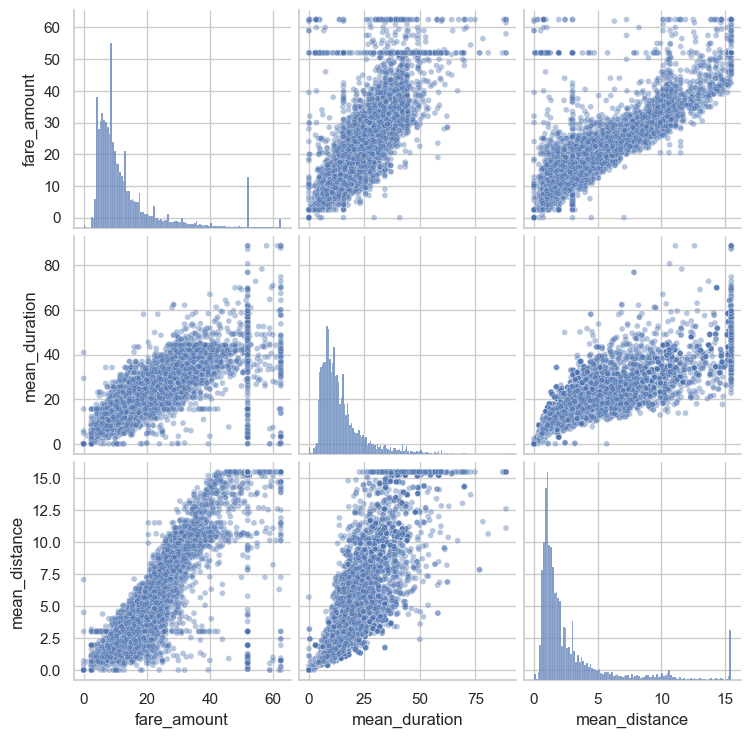

In [367]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5}
             )

The variables all show linear correlation with each other and requires further investigation.

Split data into outcome variable and features(x, y)

In [368]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,1
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


Dummy encode categorical variables

In [369]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2
0,6,3.521667,22.847222,1,False,True
1,1,3.108889,24.470370,0,True,False
2,1,0.881429,7.250000,1,True,False
3,1,3.700000,30.250000,0,False,True
4,1,4.435000,14.616667,0,False,True


Split data into training and test sets\
The test set should contain 20% of the total samples. Set random_state=42

In [370]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the data\
Use StandardScaler(), fit(), and transform() to standardize the X_train variables. Assign the results to a variable called X_train_scaled.

In [371]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.49801541 -0.01256329  0.01326506 -0.79847903 -0.89575785  0.89685681]
 [-0.49801541  0.54128602 -0.03693105  1.25238104 -0.89575785  0.89685681]
 [ 0.28354727 -0.4516965   0.03467023 -0.79847903 -0.89575785  0.89685681]
 ...
 [ 0.28354727 -0.54837349 -0.50519009  1.25238104 -0.89575785  0.89685681]
 [ 0.28354727 -0.23038268  0.39280715 -0.79847903 -0.89575785  0.89685681]
 [-0.49801541  2.07334241  0.76675095 -0.79847903 -0.89575785  0.89685681]]


Fit the model\
Instantiate the model and fit it to the training data.

In [372]:
# Fit your model to the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Evaluation of the Model Performance
I evaluated the model performance by calculating the Residual Sum of Squares and the explained Variance Score (R^2), Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [373]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.849867734970075
R^2: 0.849867734970075
MAE: 2.1841120250129666
MSE: 16.967836236973852
RMSE: 4.119203349796396


I calculated the same metrics on the test data. I also scaled the X_test data using the scaler that was fit to the training data. Call the results X_test_scaled.\
NB:\
Do not refit the scaler to the testing data, just transform it.

In [374]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [375]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8307508609328278
R^2: 0.8307508609328278
MAE: 2.1478007970881206
MSE: 17.493643310042145
RMSE: 4.182540293893431


# RESULTS

The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.831 means that 83.1% of the variance in the fare_amount variable is described by the model.

The Mean Absolute Error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

Coefficients\
Use the coef_ attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model.

In [376]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_1,VendorID_2
0,-0.001144,7.558776,2.45905,0.122281,1.326589,1.317975


The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of $7.13. This is incorrect. Remember, the data used to train the model was standardized with StandardScaler(). As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of $7.13.

#### NOTE
1. When the mean_distance and mean_duration columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that was in the test set. This is known as data leakage. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage. To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this. In this case, the data leakage improved the R2 score by ~0.03.
2. Imputing the fare amount for RatecodeID 2 after training the model and then calculating model performance metrics on the post-imputed data is not best practice. It would be better to separate the rides that did not have rate codes of 2, train the model on that data specifically, and then add the RatecodeID 2 data (and its imputed rates) after. This would prevent training the model on data that you don't need a model for, and would likely result in a better final model. However, the steps were combined for simplicity.

In [377]:
#SAVE THIS DATAFRAME
nyc_predict = df3.to_csv('nyc_predict.csv', index=False)